# References

* https://scikit-learn.org/stable/getting_started.html
* https://scikit-learn.org/stable/supervised_learning.html
* https://pandas.pydata.org/
* https://numpy.org/devdocs/
* https://github.com/numpy/numpy
* https://matplotlib.org/stable/index.html
* https://seaborn.pydata.org/

In [1]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as mplt
import pandas as pd
import seaborn as sns
import matplotlib.style as style 

In [2]:
ckd_df = pd.read_csv('kidney_disease.csv')

In [3]:
#Diplay first five records
ckd_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
#Display last five records
ckd_df.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


# Dataset Description and Attribute Information

In [5]:
# Checking the information of the columns and null values

In [6]:
ckd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
# Number of rows and columns
ckd_df.shape

(400, 26)

# Data Cleaning

In [8]:
# Removing irrelevant data

In [9]:
#Dropping irrelevant columns -- 
ckd_df = ckd_df.drop('id',axis=1)    # dropping ID column
ckd_df = ckd_df.drop('su',axis=1)    # dropping SU column
ckd_df = ckd_df.drop('pc',axis=1)    # dropping PC column
ckd_df = ckd_df.drop('pcc',axis=1)   # dropping PCC column
ckd_df = ckd_df.drop('ba',axis=1)    # dropping BA column
ckd_df = ckd_df.drop('pot',axis=1)   # dropping POT column
ckd_df = ckd_df.drop('rc',axis=1)    # dropping RC column
ckd_df = ckd_df.drop('appet',axis=1) # dropping APPET column
ckd_df = ckd_df.drop('pe',axis=1)    # dropping PE column
ckd_df = ckd_df.drop('ane',axis=1)   # dropping ANE column
ckd_df.head()

,age,bp,sg,al,rbc,bgr,bu,sc,sod,hemo,pcv,wc,htn,dm,cad,classification
0,48.0,80.0,1.020,1.0,NaN,121.0,36.0,1.2,NaN,15.4,44,7800,yes,yes,no,ckd
1,7.0,50.0,1.020,4.0,NaN,NaN,18.0,0.8,NaN,11.3,38,6000,no,no,no,ckd
2,62.0,80.0,1.010,2.0,normal,423.0,53.0,1.8,NaN,9.6,31,7500,no,yes,no,ckd
3,48.0,70.0,1.005,4.0,normal,117.0,56.0,3.8,111.0,11.2,32,6700,yes,no,no,ckd
4,51.0,80.0,1.010,2.0,normal,106.0,26.0,1.4,NaN,11.6,35,7300,no,no,no,ckd


In [10]:
# Rename all the column names to understand the abbreviations and to make it user friendly

In [11]:
#Renaming Column Names
ckd_df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'red_blood_cells',
              'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'haemoglobin', 'packed_cell_volume', 'white_blood_cell',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'class']

In [12]:
# Number of rows and columns
ckd_df.shape

(400, 16)

In [13]:
# Statistical information of the dataset
ckd_df.describe()

,age,blood_pressure,specific_gravity,albumin,blood_glucose_random,blood_urea,serum_creatinine,sodium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,356.000000,381.000000,383.000000,313.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,148.036517,57.425722,3.072454,137.528754,12.526437
std,17.169714,13.683637,0.005717,1.352679,79.281714,50.503006,5.741126,10.408752,2.912587
min,2.000000,50.000000,1.005000,0.000000,22.000000,1.500000,0.400000,4.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,99.000000,27.000000,0.900000,135.000000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,121.000000,42.000000,1.300000,138.000000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,163.000000,66.000000,2.800000,142.000000,15.000000
max,90.000000,180.000000,1.025000,5.000000,490.000000,391.000000,76.000000,163.000000,17.800000


In [14]:
# Finding the unique values from the columns

In [15]:
# Age

In [16]:
ckd_df['age'].unique()

array([48.,  7., 62., 51., 60., 68., 24., 52., 53., 50., 63., 40., 47.,
       61., 21., 42., 75., 69., nan, 73., 70., 65., 76., 72., 82., 46.,
       45., 35., 54., 11., 59., 67., 15., 55., 44., 26., 64., 56.,  5.,
       74., 38., 58., 71., 34., 17., 12., 43., 41., 57.,  8., 39., 66.,
       81., 14., 27., 83., 30.,  4.,  3.,  6., 32., 80., 49., 90., 78.,
       19.,  2., 33., 36., 37., 23., 25., 20., 29., 28., 22., 79.])

In [17]:
# Blood Pressure

In [18]:
ckd_df['blood_pressure'].unique()

array([ 80.,  50.,  70.,  90.,  nan, 100.,  60., 110., 140., 180., 120.])

In [19]:
# Specific Gravity

In [20]:
ckd_df['specific_gravity'].unique()

array([1.02 , 1.01 , 1.005, 1.015,   nan, 1.025])

In [21]:
# Albumin

In [22]:
ckd_df['albumin'].unique()

array([ 1.,  4.,  2.,  3.,  0., nan,  5.])

In [23]:
# Red Blood Cells

In [24]:
ckd_df['red_blood_cells'].unique()

array([nan, 'normal', 'abnormal'], dtype=object)

In [25]:
# Blood Glucose Random

In [26]:
ckd_df['blood_glucose_random'].unique()

array([121.,  nan, 423., 117., 106.,  74., 100., 410., 138.,  70., 490.,
       380., 208.,  98., 157.,  76.,  99., 114., 263., 173.,  95., 108.,
       156., 264., 123.,  93., 107., 159., 140., 171., 270.,  92., 137.,
       204.,  79., 207., 124., 144.,  91., 162., 246., 253., 141., 182.,
        86., 150., 146., 425., 112., 250., 360., 163., 129., 133., 102.,
       158., 165., 132., 104., 127., 415., 169., 251., 109., 280., 210.,
       219., 295.,  94., 172., 101., 298., 153.,  88., 226., 143., 115.,
        89., 297., 233., 294., 323., 125.,  90., 308., 118., 224., 128.,
       122., 214., 213., 268., 256.,  84., 105., 288., 139.,  78., 273.,
       242., 424., 303., 148., 160., 192., 307., 220., 447., 309.,  22.,
       111., 261., 215., 234., 131., 352.,  80., 239., 110., 130., 184.,
       252., 113., 230., 341., 255., 103., 238., 248., 120., 241., 269.,
       201., 203., 463., 176.,  82., 119.,  97.,  96.,  81., 116., 134.,
        85.,  83.,  87.,  75.])

In [27]:
# Blood Urea

In [28]:
ckd_df['blood_urea'].unique()

array([ 36. ,  18. ,  53. ,  56. ,  26. ,  25. ,  54. ,  31. ,  60. ,
       107. ,  55. ,  72. ,  86. ,  90. , 162. ,  46. ,  87. ,  27. ,
       148. , 180. , 163. ,   nan,  50. ,  75. ,  45. ,  28. , 155. ,
        33. ,  39. , 153. ,  29. ,  65. , 103. ,  70. ,  80. ,  20. ,
       202. ,  77. ,  89. ,  24. ,  17. ,  32. , 114. ,  66. ,  38. ,
       164. , 142. ,  96. , 391. ,  15. , 111. ,  73. ,  19. ,  92. ,
        35. ,  16. , 139. ,  48. ,  85. ,  98. , 186. ,  37. ,  47. ,
        52. ,  82. ,  51. , 106. ,  22. , 217. ,  88. , 118. ,  50.1,
        71. ,  34. ,  40. ,  21. , 219. ,  30. , 125. , 166. ,  49. ,
       208. , 176. ,  68. , 145. , 165. , 322. ,  23. , 235. , 132. ,
        76. ,  42. ,  44. ,  41. , 113. ,   1.5, 146. ,  58. , 133. ,
       137. ,  67. , 115. , 223. ,  98.6, 158. ,  94. ,  74. , 150. ,
        61. ,  57. ,  95. , 191. ,  93. , 241. ,  64. ,  79. , 215. ,
       309. ,  10. ])

In [29]:
# Serum Creatinine

In [30]:
ckd_df['serum_creatinine'].unique()

array([ 1.2 ,  0.8 ,  1.8 ,  3.8 ,  1.4 ,  1.1 , 24.  ,  1.9 ,  7.2 ,
        4.  ,  2.7 ,  2.1 ,  4.6 ,  4.1 ,  9.6 ,  2.2 ,  5.2 ,  1.3 ,
        1.6 ,  3.9 , 76.  ,  7.7 ,   nan,  2.4 ,  7.3 ,  1.5 ,  2.5 ,
        2.  ,  3.4 ,  0.7 ,  1.  , 10.8 ,  6.3 ,  5.9 ,  0.9 ,  3.  ,
        3.25,  9.7 ,  6.4 ,  3.2 , 32.  ,  0.6 ,  6.1 ,  3.3 ,  6.7 ,
        8.5 ,  2.8 , 15.  ,  2.9 ,  1.7 ,  3.6 ,  5.6 ,  6.5 ,  4.4 ,
       10.2 , 11.5 ,  0.5 , 12.2 ,  5.3 ,  9.2 , 13.8 , 16.9 ,  6.  ,
        7.1 , 18.  ,  2.3 , 13.  , 48.1 , 14.2 , 16.4 ,  2.6 ,  7.5 ,
        4.3 , 18.1 , 11.8 ,  9.3 ,  6.8 , 13.5 , 12.8 , 11.9 , 12.  ,
       13.4 , 15.2 , 13.3 ,  0.4 ])

In [31]:
# Sodium

In [32]:
ckd_df['sodium'].unique()

array([  nan, 111. , 142. , 104. , 114. , 131. , 138. , 135. , 130. ,
       141. , 139. ,   4.5, 136. , 129. , 140. , 132. , 133. , 134. ,
       125. , 163. , 137. , 128. , 143. , 127. , 146. , 126. , 122. ,
       147. , 124. , 115. , 145. , 113. , 120. , 150. , 144. ])

In [33]:
# Haemoglobin

In [34]:
ckd_df['haemoglobin'].unique()

array([15.4, 11.3,  9.6, 11.2, 11.6, 12.2, 12.4, 10.8,  9.5,  9.4,  9.7,
        9.8,  5.6,  7.6, 12.6, 12.1, 12.7, 10.3,  7.7, 10.9,  nan, 11.1,
        9.9, 12.5, 12.9, 10.1, 12. , 13. ,  7.9,  9.3, 15. , 10. ,  8.6,
       13.6, 10.2, 10.5,  6.6, 11. ,  7.5, 15.6, 15.2,  4.8,  9.1,  8.1,
       11.9, 13.5,  8.3,  7.1, 16.1, 10.4,  9.2,  6.2, 13.9, 14.1,  6. ,
       11.8, 11.7, 11.4, 14. ,  8.2, 13.2,  6.1,  8. , 12.3,  8.4, 14.3,
        9. ,  8.7, 10.6, 13.1, 10.7,  5.5,  5.8,  6.8,  8.8,  8.5, 13.8,
       11.5,  7.3, 13.7, 12.8, 13.4,  6.3,  3.1, 17. , 15.9, 14.5, 15.5,
       16.2, 14.4, 14.2, 16.3, 14.8, 16.5, 15.7, 13.3, 14.6, 16.4, 16.9,
       16. , 14.7, 16.6, 14.9, 16.7, 16.8, 15.8, 15.1, 17.1, 17.2, 15.3,
       17.3, 17.4, 17.7, 17.8, 17.5, 17.6])

In [35]:
# Packed Cell Volume

In [36]:
ckd_df['packed_cell_volume'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [37]:
# White Blood Cells

In [38]:
ckd_df['white_blood_cell'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [39]:
# Red Blood Cells

In [40]:
# ckd_df['red_blood_cell'].unique()

In [41]:
# Hypertension

In [42]:
ckd_df['hypertension'].unique()

array(['yes', 'no', nan], dtype=object)

In [43]:
# Diabetes Mellitus

In [44]:
ckd_df['diabetes_mellitus'].unique()

array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

In [45]:
# Coronary Artery Disease

In [46]:
ckd_df['coronary_artery_disease'].unique()

array(['no', 'yes', '\tno', nan], dtype=object)

In [47]:
# Class

In [48]:
ckd_df['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [49]:
#
# packed_cell_volume, red_blood_cell_count and white_blood_cell_count - convert into numerical data type 
# i.e, it is object data type at present specific_gravity, albumin - convert into nominal ie, float to object'''

In [50]:
# convert packed_cell_volume into numerical data type
ckd_df['packed_cell_volume'] = pd.to_numeric(ckd_df['packed_cell_volume'],errors='coerce')

In [51]:
# convert red_blood_cell_count into numerical data type
#ckd_df['red_blood_cell'] = pd.to_numeric(ckd_df['red_blood_cell'],errors='coerce')

In [52]:
# convert white_blood_cell_count into numerical data type
ckd_df['white_blood_cell'] = pd.to_numeric(ckd_df['white_blood_cell'],errors='coerce')

In [53]:
# convert specific_gravity into nominal i.e, object data type

ckd_df[['specific_gravity']] = ckd_df[['specific_gravity']].astype('object')

In [54]:
# convert albumin into nominal i.e, object data type

ckd_df[['albumin']] = ckd_df[['albumin']].astype('object')

In [55]:
# Replacing incorrect values in categorical columns

# '\tno', '\tyes', ' yes', '\tno', 'ckd\t', 'notckd' in categorical columns - 
# replace all the incorrect values to meaningful values

In [56]:
# diabetes_mellitus
ckd_df['diabetes_mellitus'].replace({'\tno':'no',' yes':'yes','\tyes':'yes'},inplace=True)

In [57]:
# coronary_artery_disease
ckd_df['coronary_artery_disease'].replace({'\tno':'no'},inplace=True)

In [58]:
# white_blood_cell
ckd_df['white_blood_cell'].replace({'\t6200':6200, '\t8400':8400, '\t?':0},inplace=True)

In [59]:
# red_blood_cell
ckd_df['red_blood_cells'].replace({'\t?':0},inplace=True)

In [60]:
#coronary_artery_disease
ckd_df['coronary_artery_disease'].replace({'\tno':'no'},inplace=True)

In [61]:
# Class
ckd_df['class'].replace({'ckd\t':'ckd'},inplace=True)

In [62]:
# Converting target column i.e, class column into ckd = 0 and notckd = 1
#ckd_df['class'].replace({'ckd':0,'notckd':1})
ckd_df['class'] = ckd_df['class'].map({'ckd':0,'notckd':1})

In [63]:
ckd_df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin',
       'red_blood_cells', 'blood_glucose_random', 'blood_urea',
       'serum_creatinine', 'sodium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'class'],
      dtype='object')

In [64]:
# coverting target column i,e class column into numeric data type for correlation
ckd_df['class'] = pd.to_numeric(ckd_df['class'],errors='coerce')

In [65]:
ckd_df.head()

,age,blood_pressure,specific_gravity,albumin,red_blood_cells,blood_glucose_random,blood_urea,serum_creatinine,sodium,haemoglobin,packed_cell_volume,white_blood_cell,hypertension,diabetes_mellitus,coronary_artery_disease,class
0,48.0,80.0,1.02,1.0,NaN,121.0,36.0,1.2,NaN,15.4,44.0,7800.0,yes,yes,no,0
1,7.0,50.0,1.02,4.0,NaN,NaN,18.0,0.8,NaN,11.3,38.0,6000.0,no,no,no,0
2,62.0,80.0,1.01,2.0,normal,423.0,53.0,1.8,NaN,9.6,31.0,7500.0,no,yes,no,0
3,48.0,70.0,1.005,4.0,normal,117.0,56.0,3.8,111.0,11.2,32.0,6700.0,yes,no,no,0
4,51.0,80.0,1.01,2.0,normal,106.0,26.0,1.4,NaN,11.6,35.0,7300.0,no,no,no,0


In [66]:
# Extracting categorical columns

In [67]:
categorical_columns = [columns for columns in ckd_df.columns if ckd_df[columns].dtype=='object']
categorical_columns

['specific_gravity',
 'albumin',
 'red_blood_cells',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease']

In [68]:
# Extracting numerical columns

In [69]:
numerical_columns = [columns for columns in ckd_df.columns if ckd_df[columns].dtype!='object']
numerical_columns

['age',
 'blood_pressure',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell',
 'class']

In [70]:
# Handling Null Values

In [71]:
# count of null values
ckd_df.isnull().sum().sort_values(ascending=True)

class                        0
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
age                          9
blood_pressure              12
serum_creatinine            17
blood_urea                  19
blood_glucose_random        44
albumin                     46
specific_gravity            47
haemoglobin                 52
packed_cell_volume          71
sodium                      87
white_blood_cell           106
red_blood_cells            152
dtype: int64

In [72]:
ckd_df.isnull().sum().sum()

668

In [73]:
ckd_df.isnull()

,age,blood_pressure,specific_gravity,albumin,red_blood_cells,blood_glucose_random,blood_urea,serum_creatinine,sodium,haemoglobin,packed_cell_volume,white_blood_cell,hypertension,diabetes_mellitus,coronary_artery_disease,class
0,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


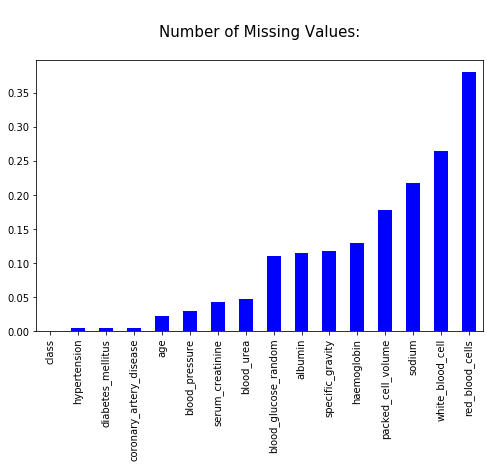

In [74]:
# Plotting number of missing values
barplot = ((ckd_df.isnull().sum()/ckd_df.shape[0])).sort_values(ascending=True)

barplot.plot(kind = 'bar',
       color = 'blue',
        figsize=(8,5))
mplt.title("\nNumber of Missing Values:\n",fontsize=15)
mplt.show()

In [75]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


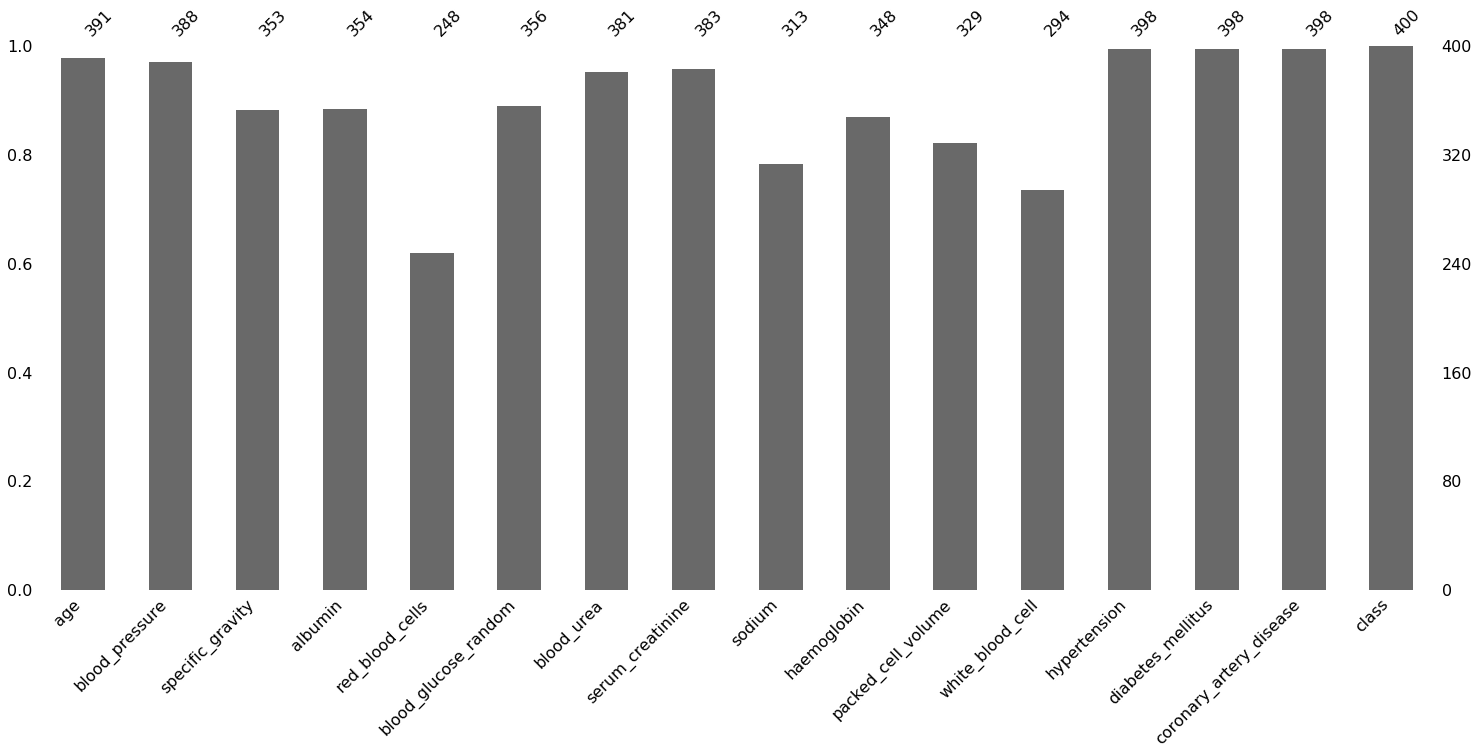

In [76]:
import missingno as msno
msno.bar(ckd_df)

In [77]:
# Observations:

#From this graph we can observe that rbc (Red Blood Cells) column have highest null values
#followed by sod (Sodium),
#wc (White Blood Cell count), etc.

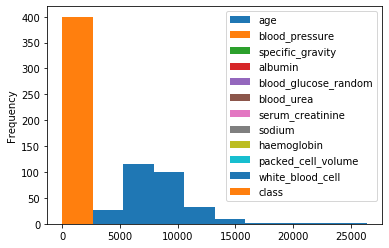

In [78]:
ckd_df.plot.hist()

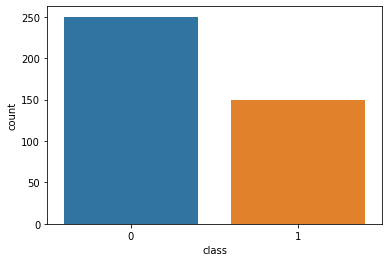

In [79]:
sns.countplot(x = "class",
              data = ckd_df)

# Exploratory Data Analysis (EDA)

# Handling And Treating Outliers

In [80]:
# Age

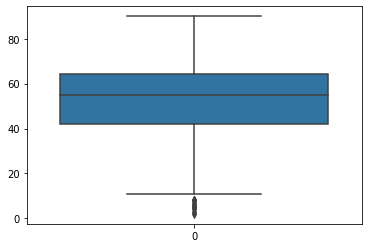

In [81]:
sns.boxplot(ckd_df['age'])

In [82]:
# Z-Score Method

In [83]:
# find the limits
upper_limit = ckd_df['age'].mean() + 3*ckd_df['age'].std()
lower_limit = ckd_df['age'].mean() - 3*ckd_df['age'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 102.992518226866
lower limit: -0.025766308707432017


In [84]:
# find the outliers
ckd_df.loc[(ckd_df['age'] > upper_limit) | (ckd_df['age'] < lower_limit)]

,age,blood_pressure,specific_gravity,albumin,red_blood_cells,blood_glucose_random,blood_urea,serum_creatinine,sodium,haemoglobin,packed_cell_volume,white_blood_cell,hypertension,diabetes_mellitus,coronary_artery_disease,class


In [85]:
# capping - change the outlier values to upper or lower limit values - without actually deleting the data

In [86]:
newage_ckd_df = ckd_df.copy()
newage_ckd_df.loc[(newage_ckd_df['age'] > upper_limit), 'age'] = upper_limit
newage_ckd_df.loc[(newage_ckd_df['age'] < lower_limit), 'age'] = lower_limit

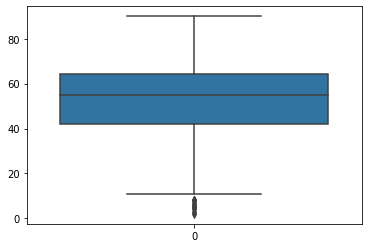

In [87]:
sns.boxplot(newage_ckd_df['age'])

In [88]:
len(ckd_df)

400

In [89]:
len(newage_ckd_df)

400

In [90]:
# Blood Pressure

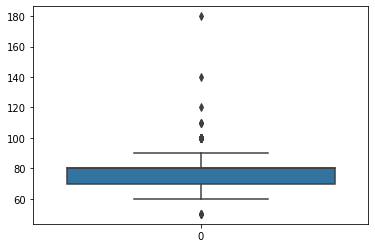

In [91]:
sns.boxplot(ckd_df['blood_pressure'])

In [92]:
# find the limits
upper_limit = ckd_df['blood_pressure'].mean() + 3*ckd_df['blood_pressure'].std()
lower_limit = ckd_df['blood_pressure'].mean() - 3*ckd_df['blood_pressure'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 117.51998464552423
lower limit: 35.41815968437269


In [93]:
# find the outliers
ckd_df.loc[(ckd_df['blood_pressure'] > upper_limit) | (ckd_df['blood_pressure'] < lower_limit)]

,age,blood_pressure,specific_gravity,albumin,red_blood_cells,blood_glucose_random,blood_urea,serum_creatinine,sodium,haemoglobin,packed_cell_volume,white_blood_cell,hypertension,diabetes_mellitus,coronary_artery_disease,class
98,50.0,140.0,NaN,NaN,NaN,101.0,106.0,6.5,135.0,6.2,18.0,5800.0,yes,yes,no,0
99,56.0,180.0,NaN,0.0,NaN,298.0,24.0,1.2,139.0,11.2,32.0,10400.0,yes,yes,no,0
211,54.0,120.0,1.015,0.0,NaN,103.0,18.0,1.2,NaN,NaN,NaN,NaN,no,no,no,0


In [94]:
# capping - change the outlier values to upper or lower limit values - without actually deleting the data

In [95]:
newbp_ckd_df = ckd_df.copy()
newbp_ckd_df.loc[(newbp_ckd_df['blood_pressure'] > upper_limit), 'blood_pressure'] = upper_limit
newbp_ckd_df.loc[(newbp_ckd_df['blood_pressure'] < lower_limit), 'blood_pressure'] = lower_limit

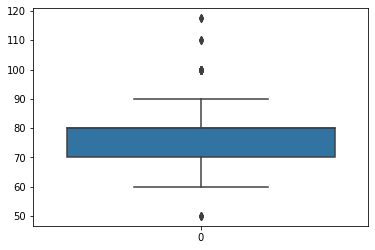

In [96]:
sns.boxplot(newbp_ckd_df['blood_pressure'])

In [97]:
# Blood Glucose Random

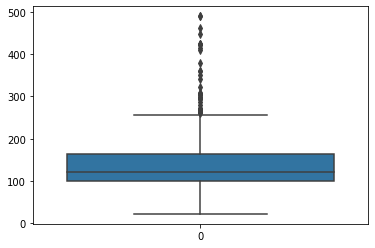

In [98]:
sns.boxplot(ckd_df['blood_glucose_random'])

In [99]:
# find the limits
upper_limit = ckd_df['blood_glucose_random'].mean() + 3*ckd_df['blood_glucose_random'].std()
lower_limit = ckd_df['blood_glucose_random'].mean() - 3*ckd_df['blood_glucose_random'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 385.8816595592859
lower limit: -89.80862585142069


In [100]:
# find the outliers
ckd_df.loc[(ckd_df['blood_glucose_random'] > upper_limit) | (ckd_df['blood_glucose_random'] < lower_limit)]

,age,blood_pressure,specific_gravity,albumin,red_blood_cells,blood_glucose_random,blood_urea,serum_creatinine,sodium,haemoglobin,packed_cell_volume,white_blood_cell,hypertension,diabetes_mellitus,coronary_artery_disease,class
2,62.0,80.0,1.01,2.0,normal,423.0,53.0,1.8,NaN,9.6,31.0,7500.0,no,yes,no,0
7,24.0,NaN,1.015,2.0,normal,410.0,31.0,1.1,NaN,12.4,44.0,6900.0,no,yes,no,0
10,50.0,60.0,1.01,2.0,NaN,490.0,55.0,4.0,NaN,9.4,28.0,NaN,yes,yes,no,0
67,45.0,80.0,1.02,3.0,normal,425.0,NaN,NaN,NaN,NaN,NaN,NaN,no,no,no,0
86,56.0,80.0,NaN,NaN,NaN,415.0,37.0,1.9,NaN,NaN,NaN,NaN,no,yes,no,0
158,71.0,60.0,1.02,3.0,normal,424.0,48.0,1.5,132.0,10.9,31.0,NaN,yes,yes,yes,0
170,66.0,70.0,1.015,2.0,NaN,447.0,41.0,1.7,131.0,12.5,33.0,9600.0,yes,yes,no,0
225,60.0,90.0,1.01,3.0,abnormal,490.0,95.0,2.7,131.0,11.5,35.0,12000.0,yes,yes,no,0
244,64.0,90.0,1.015,3.0,NaN,463.0,64.0,2.8,135.0,12.2,40.0,9800.0,yes,yes,no,0
248,59.0,70.0,1.01,1.0,abnormal,424.0,55.0,1.7,138.0,12.6,37.0,10200.0,yes,yes,yes,0


In [101]:
# capping - change the outlier values to upper or lower limit values - without actually deleting the data

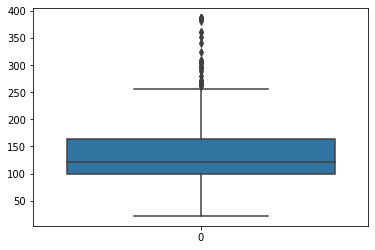

In [102]:
newbgr_ckd_df = ckd_df.copy()
newbgr_ckd_df.loc[(newbgr_ckd_df['blood_glucose_random'] > upper_limit), 'blood_glucose_random'] = upper_limit
newbgr_ckd_df.loc[(newbgr_ckd_df['blood_glucose_random'] < lower_limit), 'blood_glucose_random'] = lower_limit
sns.boxplot(newbgr_ckd_df['blood_glucose_random'])

In [103]:
# Blood Urea

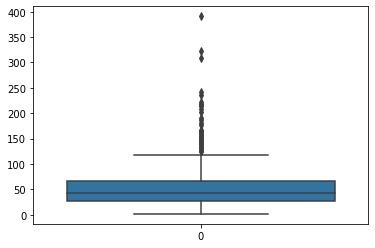

In [104]:
sns.boxplot(ckd_df['blood_urea'])

In [105]:
# find the limits
upper_limit = ckd_df['blood_urea'].mean() + 3*ckd_df['blood_urea'].std()
lower_limit = ckd_df['blood_urea'].mean() - 3*ckd_df['blood_urea'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 208.9347393324444
lower limit: -94.0832957628906


In [106]:
# find the outliers
ckd_df.loc[(ckd_df['blood_urea'] > upper_limit) | (ckd_df['blood_urea'] < lower_limit)]

,age,blood_pressure,specific_gravity,albumin,red_blood_cells,blood_glucose_random,blood_urea,serum_creatinine,sodium,haemoglobin,packed_cell_volume,white_blood_cell,hypertension,diabetes_mellitus,coronary_artery_disease,class
61,67.0,80.0,1.01,1.0,normal,182.0,391.0,32.0,163.0,NaN,NaN,NaN,no,no,no,0
103,76.0,70.0,1.015,2.0,normal,226.0,217.0,10.2,NaN,10.2,36.0,12700.0,yes,no,no,0
122,34.0,70.0,NaN,NaN,NaN,NaN,219.0,12.2,130.0,6.0,NaN,NaN,yes,no,no,0
145,57.0,90.0,1.015,5.0,abnormal,NaN,322.0,13.0,126.0,8.0,24.0,4200.0,yes,yes,yes,0
153,55.0,90.0,1.01,2.0,abnormal,273.0,235.0,14.2,132.0,8.3,22.0,14600.0,yes,yes,no,0
193,32.0,90.0,1.025,1.0,abnormal,NaN,223.0,18.1,113.0,5.5,15.0,2600.0,yes,yes,no,0
238,72.0,100.0,NaN,NaN,NaN,201.0,241.0,13.4,127.0,9.4,28.0,NaN,yes,yes,no,0
246,48.0,110.0,1.015,3.0,abnormal,106.0,215.0,15.2,120.0,8.6,26.0,5000.0,yes,no,yes,0
249,56.0,90.0,1.01,4.0,normal,176.0,309.0,13.3,124.0,3.1,9.0,5400.0,yes,yes,no,0


In [107]:
# capping - change the outlier values to upper or lower limit values - without actually deleting the data

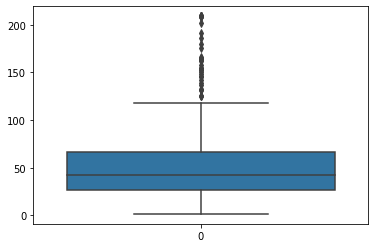

In [108]:
newbu_ckd_df = ckd_df.copy()
newbu_ckd_df.loc[(newbu_ckd_df['blood_urea'] > upper_limit), 'blood_urea'] = upper_limit
newbu_ckd_df.loc[(newbu_ckd_df['blood_urea'] < lower_limit), 'blood_urea'] = lower_limit
sns.boxplot(newbu_ckd_df['blood_urea'])

In [109]:
# Serum Creatinine

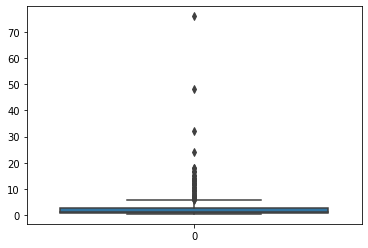

In [110]:
sns.boxplot(ckd_df['serum_creatinine'])

In [111]:
# find the limits
upper_limit = ckd_df['serum_creatinine'].mean() + 3*ckd_df['serum_creatinine'].std()
lower_limit = ckd_df['serum_creatinine'].mean() - 3*ckd_df['serum_creatinine'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 20.295832508673335
lower limit: -14.15092389248535


In [112]:
# find the outliers
ckd_df.loc[(ckd_df['serum_creatinine'] > upper_limit) | (ckd_df['serum_creatinine'] < lower_limit)]

,age,blood_pressure,specific_gravity,albumin,red_blood_cells,blood_glucose_random,blood_urea,serum_creatinine,sodium,haemoglobin,packed_cell_volume,white_blood_cell,hypertension,diabetes_mellitus,coronary_artery_disease,class
6,68.0,70.0,1.01,0.0,NaN,100.0,54.0,24.0,104.0,12.4,36.0,NaN,no,no,no,0
21,60.0,90.0,NaN,NaN,NaN,NaN,180.0,76.0,4.5,10.9,32.0,6200.0,yes,yes,yes,0
61,67.0,80.0,1.01,1.0,normal,182.0,391.0,32.0,163.0,NaN,NaN,NaN,no,no,no,0
148,69.0,60.0,NaN,NaN,NaN,171.0,26.0,48.1,NaN,NaN,NaN,NaN,yes,no,no,0


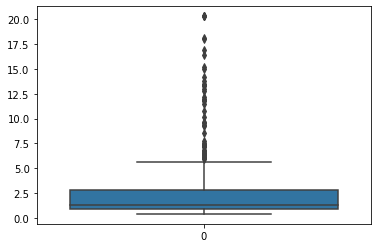

In [113]:
# capping - change the outlier values to upper or lower limit values - without actually deleting the data
newsc_ckd_df = ckd_df.copy()
newsc_ckd_df.loc[(newsc_ckd_df['serum_creatinine'] > upper_limit), 'serum_creatinine'] = upper_limit
newsc_ckd_df.loc[(newsc_ckd_df['serum_creatinine'] < lower_limit), 'serum_creatinine'] = lower_limit
sns.boxplot(newsc_ckd_df['serum_creatinine'])

In [114]:
# Sodium

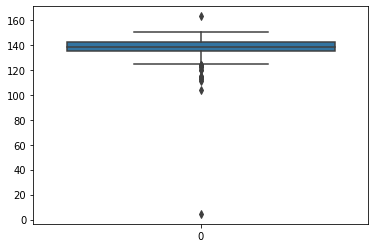

In [115]:
sns.boxplot(ckd_df['sodium'])

In [116]:
# find the limits
upper_limit = ckd_df['sodium'].mean() + 3*ckd_df['sodium'].std()
lower_limit = ckd_df['sodium'].mean() - 3*ckd_df['sodium'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 168.75501014900658
lower limit: 106.30249783821385


In [117]:
# find the outliers
ckd_df.loc[(ckd_df['sodium'] > upper_limit) | (ckd_df['sodium'] < lower_limit)]

,age,blood_pressure,specific_gravity,albumin,red_blood_cells,blood_glucose_random,blood_urea,serum_creatinine,sodium,haemoglobin,packed_cell_volume,white_blood_cell,hypertension,diabetes_mellitus,coronary_artery_disease,class
6,68.0,70.0,1.01,0.0,NaN,100.0,54.0,24.0,104.0,12.4,36.0,NaN,no,no,no,0
21,60.0,90.0,NaN,NaN,NaN,NaN,180.0,76.0,4.5,10.9,32.0,6200.0,yes,yes,yes,0


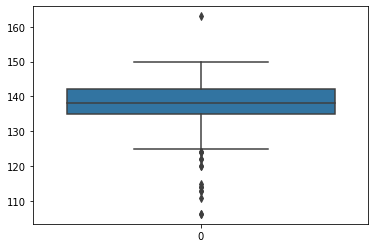

In [118]:
# capping - change the outlier values to upper or lower limit values - without actually deleting the data
newso_ckd_df = ckd_df.copy()
newso_ckd_df.loc[(newso_ckd_df['sodium'] > upper_limit), 'sodium'] = upper_limit
newso_ckd_df.loc[(newso_ckd_df['sodium'] < lower_limit), 'sodium'] = lower_limit
sns.boxplot(newso_ckd_df['sodium'])

In [119]:
# Haemoglobin

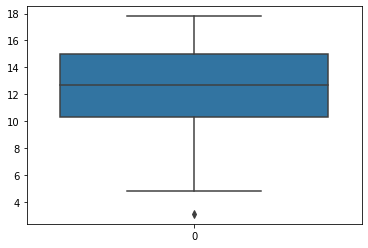

In [120]:
sns.boxplot(ckd_df['haemoglobin'])

In [121]:
# find the limits
upper_limit = ckd_df['haemoglobin'].mean() + 3*ckd_df['haemoglobin'].std()
lower_limit = ckd_df['haemoglobin'].mean() - 3*ckd_df['haemoglobin'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 21.26419660808949
lower limit: 3.788676955128901


In [122]:
# find the outliers
ckd_df.loc[(ckd_df['haemoglobin'] > upper_limit) | (ckd_df['haemoglobin'] < lower_limit)]

,age,blood_pressure,specific_gravity,albumin,red_blood_cells,blood_glucose_random,blood_urea,serum_creatinine,sodium,haemoglobin,packed_cell_volume,white_blood_cell,hypertension,diabetes_mellitus,coronary_artery_disease,class
249,56.0,90.0,1.01,4.0,normal,176.0,309.0,13.3,124.0,3.1,9.0,5400.0,yes,yes,no,0


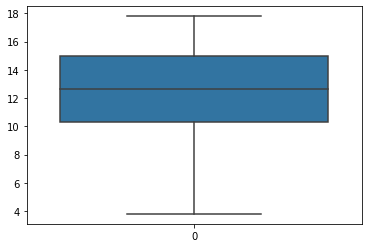

In [123]:
# capping - change the outlier values to upper or lower limit values - without actually deleting the data
newhae_ckd_df = ckd_df.copy()
newhae_ckd_df.loc[(newhae_ckd_df['haemoglobin'] > upper_limit), 'haemoglobin'] = upper_limit
newhae_ckd_df.loc[(newhae_ckd_df['haemoglobin'] < lower_limit), 'haemoglobin'] = lower_limit
sns.boxplot(newhae_ckd_df['haemoglobin'])

In [124]:
# Packed Cell Volume

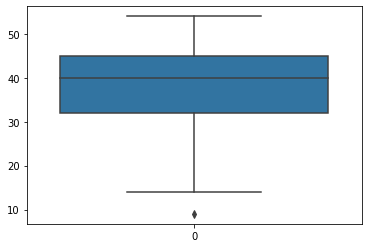

In [125]:
sns.boxplot(ckd_df['packed_cell_volume'])

In [126]:
# find the limits
upper_limit = ckd_df['packed_cell_volume'].mean() + 3*ckd_df['packed_cell_volume'].std()
lower_limit = ckd_df['packed_cell_volume'].mean() - 3*ckd_df['packed_cell_volume'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 65.85481292446597
lower limit: 11.914184036020345


In [127]:
# find the outliers
ckd_df.loc[(ckd_df['packed_cell_volume'] > upper_limit) | (ckd_df['packed_cell_volume'] < lower_limit)]

,age,blood_pressure,specific_gravity,albumin,red_blood_cells,blood_glucose_random,blood_urea,serum_creatinine,sodium,haemoglobin,packed_cell_volume,white_blood_cell,hypertension,diabetes_mellitus,coronary_artery_disease,class
249,56.0,90.0,1.01,4.0,normal,176.0,309.0,13.3,124.0,3.1,9.0,5400.0,yes,yes,no,0


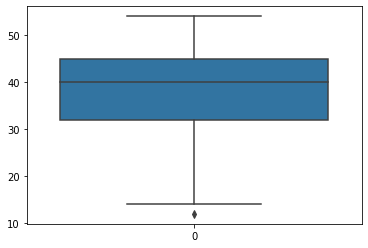

In [128]:
# capping - change the outlier values to upper or lower limit values - without actually deleting the data
newpcv_ckd_df = ckd_df.copy()
newpcv_ckd_df.loc[(newpcv_ckd_df['packed_cell_volume'] > upper_limit), 'packed_cell_volume'] = upper_limit
newpcv_ckd_df.loc[(newpcv_ckd_df['packed_cell_volume'] < lower_limit), 'packed_cell_volume'] = lower_limit
sns.boxplot(newpcv_ckd_df['packed_cell_volume'])

In [129]:
# White Blood Cell

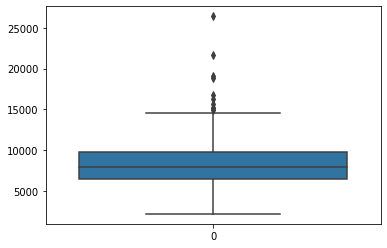

In [130]:
sns.boxplot(ckd_df['white_blood_cell'])

In [131]:
# find the limits
upper_limit = ckd_df['white_blood_cell'].mean() + 3*ckd_df['white_blood_cell'].std()
lower_limit = ckd_df['white_blood_cell'].mean() - 3*ckd_df['white_blood_cell'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 17239.545020210608
lower limit: -427.3001222514249


In [132]:
# find the outliers
ckd_df.loc[(ckd_df['white_blood_cell'] > upper_limit) | (ckd_df['white_blood_cell'] < lower_limit)]

,age,blood_pressure,specific_gravity,albumin,red_blood_cells,blood_glucose_random,blood_urea,serum_creatinine,sodium,haemoglobin,packed_cell_volume,white_blood_cell,hypertension,diabetes_mellitus,coronary_artery_disease,class
48,73.0,70.0,1.005,0.0,normal,70.0,32.0,0.9,125.0,10.0,29.0,18900.0,yes,yes,no,0
49,60.0,70.0,1.01,2.0,normal,144.0,72.0,3.0,NaN,9.7,29.0,21600.0,yes,yes,no,0
181,45.0,70.0,1.025,2.0,normal,117.0,52.0,2.2,136.0,10.0,30.0,19100.0,no,no,no,0
198,59.0,100.0,1.02,4.0,normal,252.0,40.0,3.2,137.0,11.2,30.0,26400.0,yes,yes,no,0


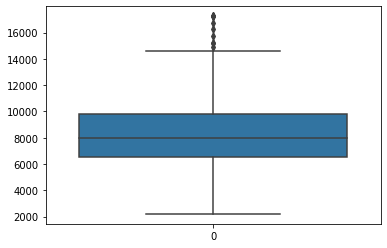

In [133]:
# capping - change the outlier values to upper or lower limit values - without actually deleting the data
newwbc_ckd_df = ckd_df.copy()
newwbc_ckd_df.loc[(newwbc_ckd_df['white_blood_cell'] > upper_limit), 'white_blood_cell'] = upper_limit
newwbc_ckd_df.loc[(newwbc_ckd_df['white_blood_cell'] < lower_limit), 'white_blood_cell'] = lower_limit
sns.boxplot(newwbc_ckd_df['white_blood_cell'])

In [134]:
# checking numerical frequency distribution

In [135]:
pip install plotly.express

  Using cached plotly_express-0.4.1-py2.py3-none-any.whl (2.9 kB)
Note: you may need to restart the kernel to use updated packages.


In [136]:
pip install -U seaborn

Requirement already up-to-date: seaborn in c:\users\viddi\anaconda3\lib\site-packages (0.12.2)
Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, '\n Frequency plot for Age \n')

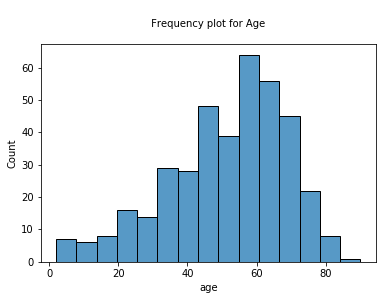

In [137]:
sns.histplot(data=ckd_df, x='age')
mplt.title("\n Frequency plot for Age \n",fontsize=10)

In [138]:
import plotly.express as px

In [139]:
def kde(columns):
    grid = sns.FacetGrid(newage_ckd_df, hue="class", height = 3.25, aspect=2)
    grid.map(sns.kdeplot, columns)
    grid.add_legend()

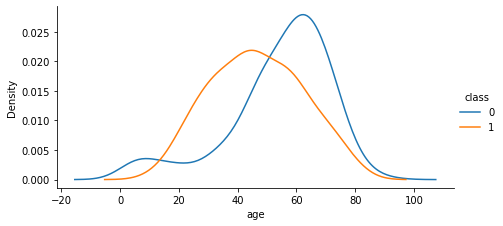

In [140]:
kde('age')

In [141]:
from matplotlib import pyplot as plt
import seaborn as sns

C:\Users\viddi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, '\n Frequency plot for age \n')

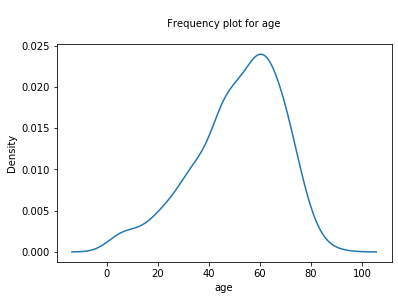

In [142]:
sns.distplot(newage_ckd_df.age, hist = False)
mplt.title("\n Frequency plot for age \n",fontsize=10)

C:\Users\viddi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


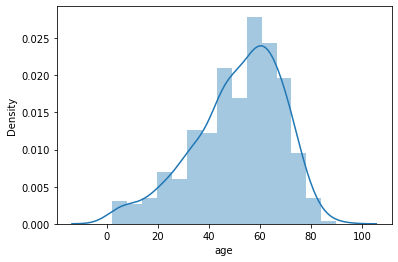

In [143]:
sns.distplot(ckd_df.age)

Text(0.5, 1.0, '\n Frequency plot for Blood Pressure \n')

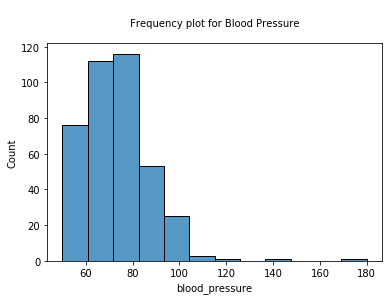

In [144]:
sns.histplot(data=ckd_df, x='blood_pressure', bins=12)
mplt.title("\n Frequency plot for Blood Pressure \n",fontsize=10)

In [145]:
def kde(columns):
    grid = sns.FacetGrid(newbp_ckd_df, hue="class", height = 3.25, aspect=2)
    grid.map(sns.kdeplot, columns)
    grid.add_legend()

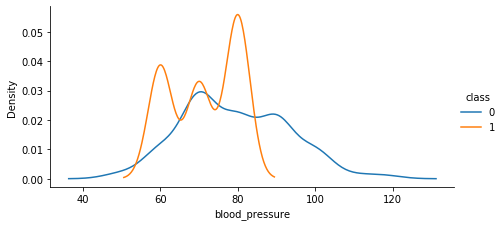

In [146]:
kde('blood_pressure')

C:\Users\viddi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, '\n Frequency plot for blood pressure \n')

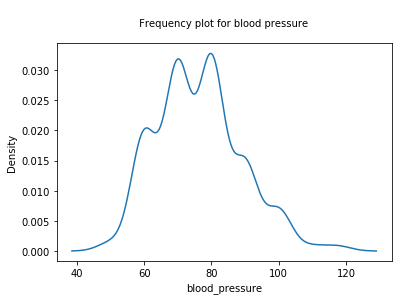

In [147]:
sns.distplot(newbp_ckd_df.blood_pressure, hist = False)
mplt.title("\n Frequency plot for blood pressure \n",fontsize=10)

Text(0.5, 1.0, '\n Frequency plot for Blood Glucose Random \n')

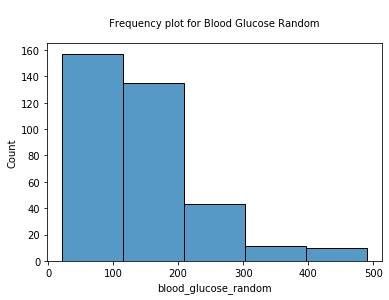

In [148]:
sns.histplot(data=ckd_df, x='blood_glucose_random',bins=5)
mplt.title("\n Frequency plot for Blood Glucose Random \n",fontsize=10)

In [149]:
#sns.histplot(data=ckd_df, x='')

In [150]:
def kde(columns):
    grid = sns.FacetGrid(newbgr_ckd_df, hue="class", height = 3.25, aspect=2)
    grid.map(sns.kdeplot, columns)
    grid.add_legend()

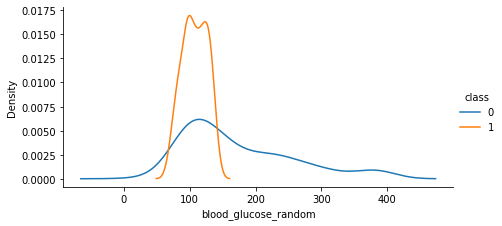

In [151]:
kde('blood_glucose_random')

C:\Users\viddi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, '\n Frequency plot for blood glucose random \n')

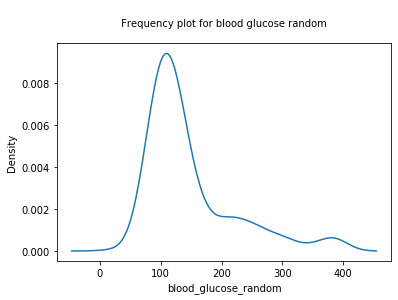

In [152]:
sns.distplot(newbgr_ckd_df.blood_glucose_random, hist = False)
mplt.title("\n Frequency plot for blood glucose random \n",fontsize=10)

Text(0.5, 1.0, '\n Frequency plot for Blood Urea \n')

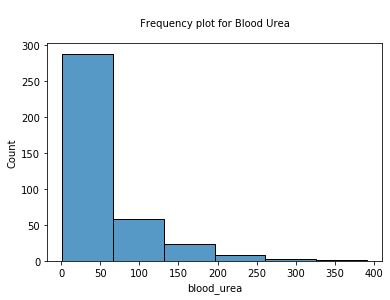

In [153]:
sns.histplot(data=ckd_df, x='blood_urea', bins=6)
mplt.title("\n Frequency plot for Blood Urea \n",fontsize=10)

In [154]:
def kde(columns):
    grid = sns.FacetGrid(newbu_ckd_df, hue="class", height = 3.25, aspect=2)
    grid.map(sns.kdeplot, columns)
    grid.add_legend()

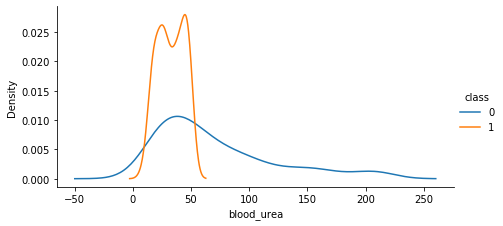

In [155]:
kde('blood_urea')

C:\Users\viddi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, '\n Frequency plot for blood urea \n')

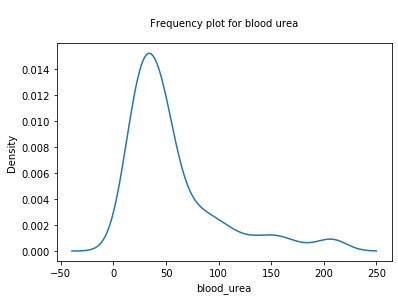

In [156]:
sns.distplot(newbu_ckd_df.blood_urea, hist = False)
mplt.title("\n Frequency plot for blood urea \n",fontsize=10)

Text(0.5, 1.0, '\n Frequency plot for Serum Creatinine \n')

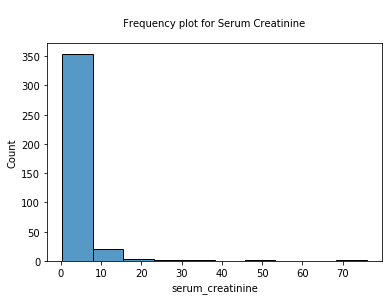

In [157]:
sns.histplot(data=ckd_df, x='serum_creatinine', bins=10)
mplt.title("\n Frequency plot for Serum Creatinine \n",fontsize=10)

In [158]:
def kde(columns):
    grid = sns.FacetGrid(newsc_ckd_df, hue="class", height = 3.25, aspect=2)
    grid.map(sns.kdeplot, columns)
    grid.add_legend()

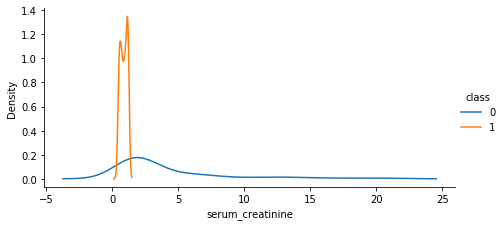

In [159]:
kde('serum_creatinine')

C:\Users\viddi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, '\n Frequency plot for serum creatinine \n')

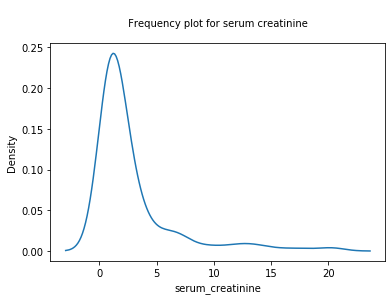

In [160]:
sns.distplot(newsc_ckd_df.serum_creatinine, hist = False)
mplt.title("\n Frequency plot for serum creatinine \n",fontsize=10)

Text(0.5, 1.0, '\n Frequency plot for Sodium \n')

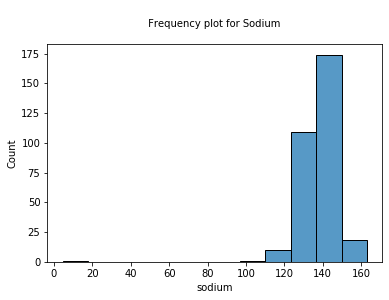

In [161]:
sns.histplot(data=ckd_df, x='sodium', bins=12)
mplt.title("\n Frequency plot for Sodium \n",fontsize=10)

In [162]:
def kde(columns):
    grid = sns.FacetGrid(newso_ckd_df, hue="class", height = 3.25, aspect=2)
    grid.map(sns.kdeplot, columns)
    grid.add_legend()

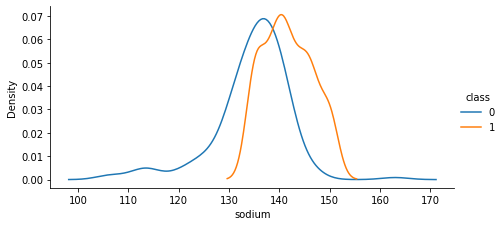

In [163]:
kde('sodium')

C:\Users\viddi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, '\n Frequency plot for sodium \n')

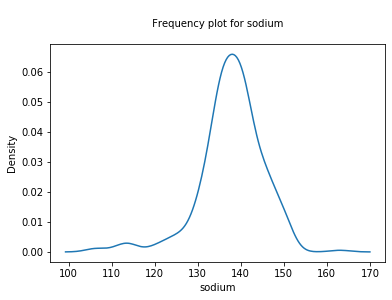

In [164]:
sns.distplot(newso_ckd_df.sodium, hist = False)
mplt.title("\n Frequency plot for sodium \n",fontsize=10)

Text(0.5, 1.0, '\n Frequency plot for Haemoglobin \n')

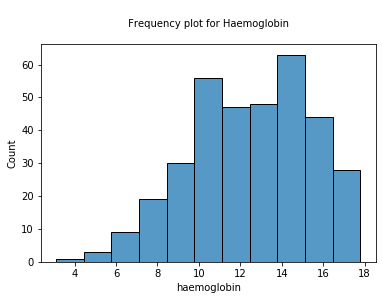

In [165]:
sns.histplot(data=ckd_df, x='haemoglobin')
mplt.title("\n Frequency plot for Haemoglobin \n",fontsize=10)

In [166]:
def kde(columns):
    grid = sns.FacetGrid(newhae_ckd_df, hue="class", height = 3.25, aspect=2)
    grid.map(sns.kdeplot, columns)
    grid.add_legend()

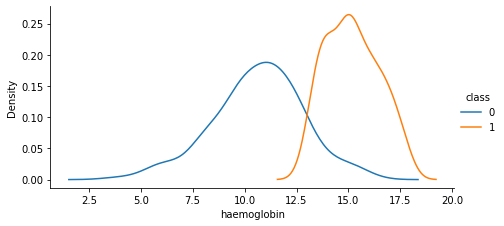

In [167]:
kde('haemoglobin')

C:\Users\viddi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, '\n Frequency plot for haemoglobin \n')

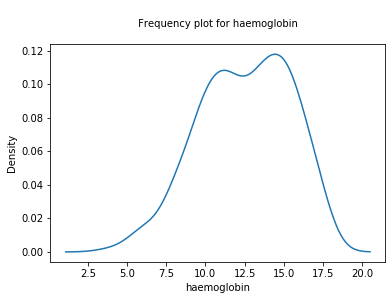

In [168]:
sns.distplot(newhae_ckd_df.haemoglobin, hist = False)
mplt.title("\n Frequency plot for haemoglobin \n",fontsize=10)

Text(0.5, 1.0, '\n Frequency plot for Packed Cell Volume \n')

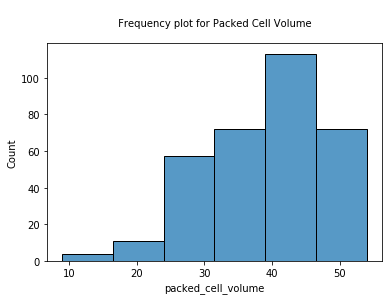

In [169]:
sns.histplot(data=ckd_df, x='packed_cell_volume', bins=6)
mplt.title("\n Frequency plot for Packed Cell Volume \n",fontsize=10)

In [170]:
def kde(columns):
    grid = sns.FacetGrid(newpcv_ckd_df, hue="class", height = 3.25, aspect=2)
    grid.map(sns.kdeplot, columns)
    grid.add_legend()

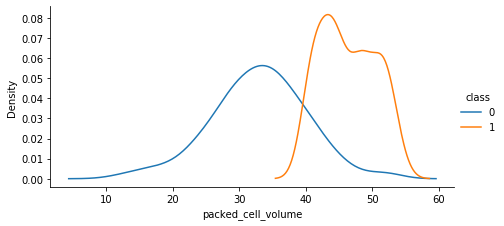

In [171]:
kde('packed_cell_volume')

C:\Users\viddi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, '\n Frequency plot for packed cell volume \n')

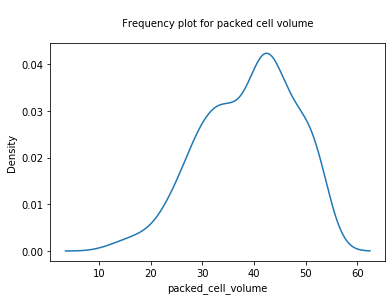

In [172]:
sns.distplot(newpcv_ckd_df.packed_cell_volume, hist = False)
mplt.title("\n Frequency plot for packed cell volume \n",fontsize=10)

Text(0.5, 1.0, '\n Frequency plot for White Blood Cells \n')

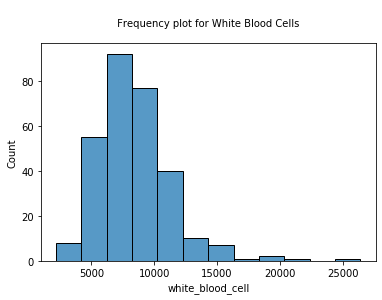

In [173]:
sns.histplot(data=ckd_df, x='white_blood_cell',bins=12)
mplt.title("\n Frequency plot for White Blood Cells \n",fontsize=10)

In [174]:
def kde(columns):
    grid = sns.FacetGrid(newwbc_ckd_df, hue="class", height = 3.25, aspect=2)
    grid.map(sns.kdeplot, columns)
    grid.add_legend()

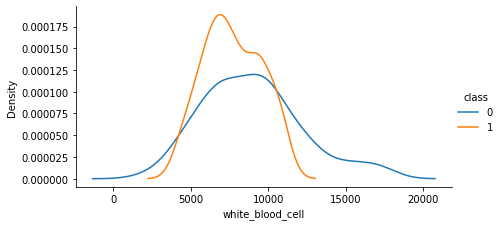

In [175]:
kde('white_blood_cell')

C:\Users\viddi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, '\n Frequency plot for white blood cell \n')

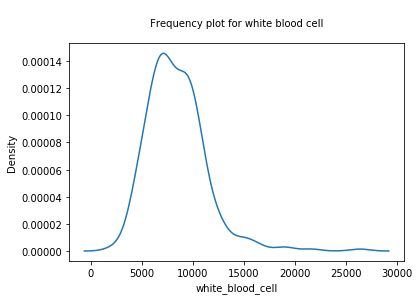

In [176]:
sns.distplot(newpcv_ckd_df.white_blood_cell, hist = False)
mplt.title("\n Frequency plot for white blood cell \n",fontsize=10)

In [177]:
# checking categorical frequency distribution

Text(0.5, 1.0, '\n Frequency plot for specific gravity \n')

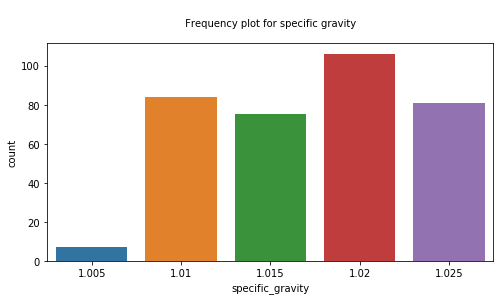

In [178]:
plt.figure(figsize=(8,4))
sns.countplot(x="specific_gravity",data=ckd_df)
mplt.title("\n Frequency plot for specific gravity \n",fontsize=10)

Text(0.5, 1.0, '\n Frequency plot for albumin \n')

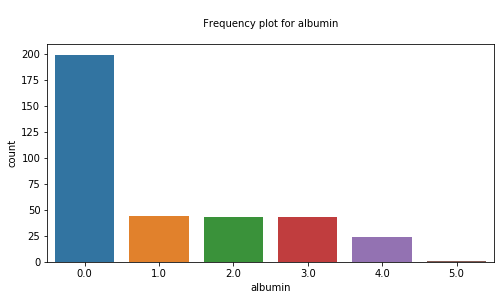

In [179]:
plt.figure(figsize=(8,4))
sns.countplot(x="albumin",data=ckd_df)
mplt.title("\n Frequency plot for albumin \n",fontsize=10)

Text(0.5, 1.0, '\n Frequency plot for red blood cells \n')

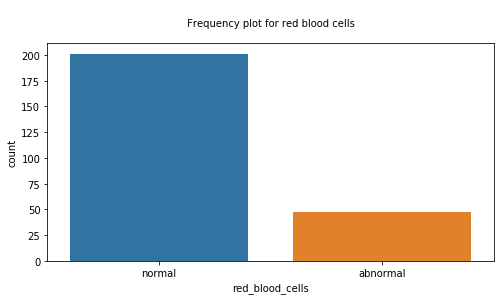

In [180]:
plt.figure(figsize=(8,4))
sns.countplot(x="red_blood_cells",data=ckd_df)
mplt.title("\n Frequency plot for red blood cells \n",fontsize=10)

Text(0.5, 1.0, '\n Frequency plot for hypertension \n')

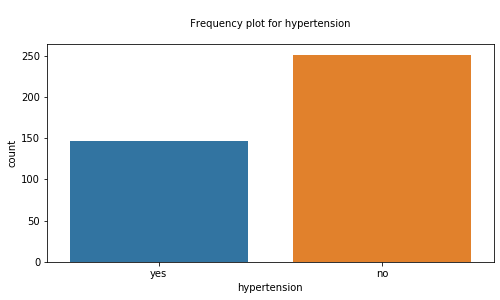

In [181]:
plt.figure(figsize=(8,4))
sns.countplot(x="hypertension",data=ckd_df)
mplt.title("\n Frequency plot for hypertension \n",fontsize=10)

Text(0.5, 1.0, '\n Frequency plot for diabetes mellitus \n')

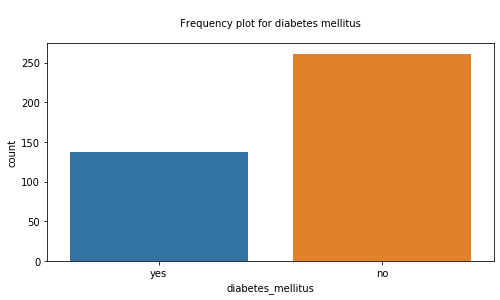

In [182]:
plt.figure(figsize=(8,4))
sns.countplot(x="diabetes_mellitus",data=ckd_df)
mplt.title("\n Frequency plot for diabetes mellitus \n",fontsize=10)

Text(0.5, 1.0, '\n Frequency plot for coronary artery disease \n')

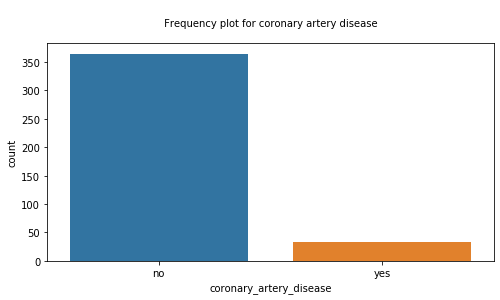

In [183]:
plt.figure(figsize=(8,4))
sns.countplot(x="coronary_artery_disease",data=ckd_df)
mplt.title("\n Frequency plot for coronary artery disease \n",fontsize=10)

In [184]:
# Corelated Heatmaps

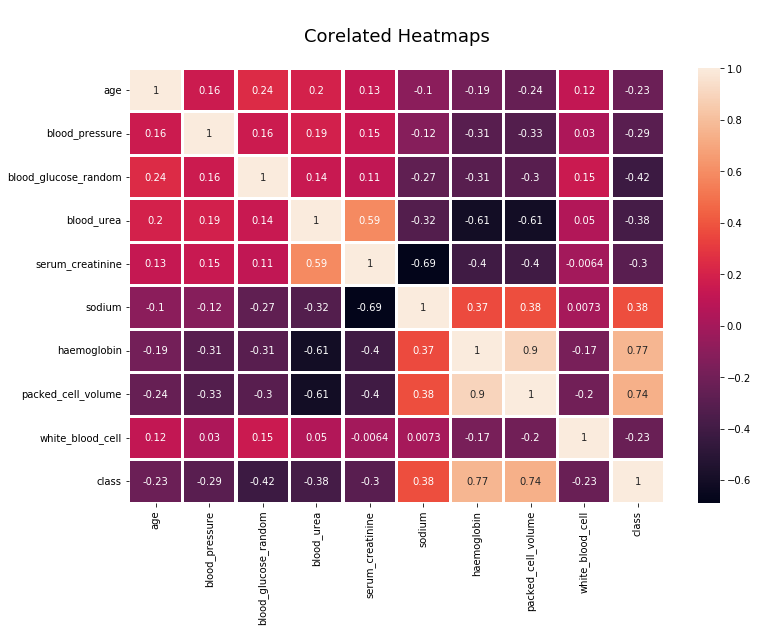

In [185]:
# Creating heatmap
plt.figure(figsize = (12,8))
# plotting the heatmap
sns.heatmap(ckd_df.corr(),annot=True,linewidths=2.25,linecolor='white')
# displaying the plotted heatmap
mplt.title("\nCorelated Heatmaps\n",fontsize=18)
plt.show()
#fig.tight_layout()

In [186]:
# Checking Null Values

In [187]:
ckd_df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
white_blood_cell           106
sodium                      87
packed_cell_volume          71
haemoglobin                 52
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
class                        0
dtype: int64

In [188]:
# Checking Null Values in Numerical Columns

In [189]:
ckd_df[numerical_columns].isnull().sum().sort_values(ascending=False)

white_blood_cell        106
sodium                   87
packed_cell_volume       71
haemoglobin              52
blood_glucose_random     44
blood_urea               19
serum_creatinine         17
blood_pressure           12
age                       9
class                     0
dtype: int64

In [190]:
# Checking Null Values in Category Columns

In [191]:
ckd_df[categorical_columns].isnull().sum().sort_values(ascending=False)

red_blood_cells            152
specific_gravity            47
albumin                     46
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
dtype: int64

In [192]:
# Handling and Treating Missing Values

In [193]:
# step 1 : filling null values, we will use two methods, random sampling for higher null values and
# step 2 : mean/mode sampling for lower null values

# creating function for random values
def func_random_value(feature):
    random_sample = ckd_df[feature].dropna().sample(ckd_df[feature].isnull().sum())
    random_sample.index = ckd_df[ckd_df[feature].isnull()].index
    ckd_df.loc[ckd_df[feature].isnull(), feature] = random_sample

In [194]:
# creating func for imputing most common value
def value_mode(feature):
    mode = ckd_df[feature].mode()[0]
    ckd_df[feature] = ckd_df[feature].fillna(mode)

In [195]:
# filling numerical columns with random sampling method
for columns in numerical_columns:
  func_random_value(columns)

In [196]:
#count of numerical null values after filling the missing values
ckd_df[numerical_columns].isnull().sum()

age                     0
blood_pressure          0
blood_glucose_random    0
blood_urea              0
serum_creatinine        0
sodium                  0
haemoglobin             0
packed_cell_volume      0
white_blood_cell        0
class                   0
dtype: int64

In [197]:
# filling red_blood cells and pus cell with random sampling method

In [198]:
func_random_value('red_blood_cells')

In [199]:
# filling categorical columns with mode method
for columns in categorical_columns:
  value_mode(columns)

In [200]:
#count of categorical null values after filling
ckd_df[categorical_columns].isnull().sum()

specific_gravity           0
albumin                    0
red_blood_cells            0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
dtype: int64

In [201]:
# checking the data frame
ckd_df.head(10)

,age,blood_pressure,specific_gravity,albumin,red_blood_cells,blood_glucose_random,blood_urea,serum_creatinine,sodium,haemoglobin,packed_cell_volume,white_blood_cell,hypertension,diabetes_mellitus,coronary_artery_disease,class
0,48.0,80.0,1.020,1.0,normal,121.0,36.0,1.2,137.0,15.4,44.0,7800.0,yes,yes,no,0
1,7.0,50.0,1.020,4.0,normal,99.0,18.0,0.8,138.0,11.3,38.0,6000.0,no,no,no,0
2,62.0,80.0,1.010,2.0,normal,423.0,53.0,1.8,132.0,9.6,31.0,7500.0,no,yes,no,0
3,48.0,70.0,1.005,4.0,normal,117.0,56.0,3.8,111.0,11.2,32.0,6700.0,yes,no,no,0
4,51.0,80.0,1.010,2.0,normal,106.0,26.0,1.4,138.0,11.6,35.0,7300.0,no,no,no,0
5,60.0,90.0,1.015,3.0,normal,74.0,25.0,1.1,142.0,12.2,39.0,7800.0,yes,yes,no,0
6,68.0,70.0,1.010,0.0,normal,100.0,54.0,24.0,104.0,12.4,36.0,5500.0,no,no,no,0
7,24.0,90.0,1.015,2.0,normal,410.0,31.0,1.1,150.0,12.4,44.0,6900.0,no,yes,no,0
8,52.0,100.0,1.015,3.0,normal,138.0,60.0,1.9,145.0,10.8,33.0,9600.0,yes,yes,no,0
9,53.0,90.0,1.020,2.0,abnormal,70.0,107.0,7.2,114.0,9.5,29.0,12100.0,yes,yes,no,0


In [202]:
# Checking unique values in categorical columns

In [203]:
for columns in categorical_columns:
  print(f"{columns} has {ckd_df[columns].nunique()} unique values")

specific_gravity has 5 unique values
albumin has 6 unique values
red_blood_cells has 2 unique values
hypertension has 2 unique values
diabetes_mellitus has 2 unique values
coronary_artery_disease has 2 unique values


In [204]:
# Checking unique values in numerical columns

In [205]:
for columns in numerical_columns:
  print(f"{columns} has {ckd_df[columns].nunique()} unique values")

age has 76 unique values
blood_pressure has 10 unique values
blood_glucose_random has 146 unique values
blood_urea has 118 unique values
serum_creatinine has 84 unique values
sodium has 34 unique values
haemoglobin has 115 unique values
packed_cell_volume has 42 unique values
white_blood_cell has 89 unique values
class has 2 unique values


In [206]:
# Label Encoding

In [207]:
#labelencoder - to make string into numeric - Yes or No to 0 and 1 for normal and abnormal
from sklearn.preprocessing import LabelEncoder

lebel = LabelEncoder()

for columns in categorical_columns[1:]:
    ckd_df[columns] = lebel.fit_transform(ckd_df[columns])
ckd_df.head(10)

,age,blood_pressure,specific_gravity,albumin,red_blood_cells,blood_glucose_random,blood_urea,serum_creatinine,sodium,haemoglobin,packed_cell_volume,white_blood_cell,hypertension,diabetes_mellitus,coronary_artery_disease,class
0,48.0,80.0,1.020,1,1,121.0,36.0,1.2,137.0,15.4,44.0,7800.0,1,1,0,0
1,7.0,50.0,1.020,4,1,99.0,18.0,0.8,138.0,11.3,38.0,6000.0,0,0,0,0
2,62.0,80.0,1.010,2,1,423.0,53.0,1.8,132.0,9.6,31.0,7500.0,0,1,0,0
3,48.0,70.0,1.005,4,1,117.0,56.0,3.8,111.0,11.2,32.0,6700.0,1,0,0,0
4,51.0,80.0,1.010,2,1,106.0,26.0,1.4,138.0,11.6,35.0,7300.0,0,0,0,0
5,60.0,90.0,1.015,3,1,74.0,25.0,1.1,142.0,12.2,39.0,7800.0,1,1,0,0
6,68.0,70.0,1.010,0,1,100.0,54.0,24.0,104.0,12.4,36.0,5500.0,0,0,0,0
7,24.0,90.0,1.015,2,1,410.0,31.0,1.1,150.0,12.4,44.0,6900.0,0,1,0,0
8,52.0,100.0,1.015,3,1,138.0,60.0,1.9,145.0,10.8,33.0,9600.0,1,1,0,0
9,53.0,90.0,1.020,2,0,70.0,107.0,7.2,114.0,9.5,29.0,12100.0,1,1,0,0


In [208]:
# Converted categorical data into integer categorical, to increase the performance of the model.
# present = 1
#normal = 1
#yes = 1
#notpresent = 0
#abnormal = 0
#no = 0
#good = 1
#poor = 0
#ckd = 1
#notckd = 0

In [209]:
# Save the final data cleaning
ckd_df.to_csv("Final_kidney_disease_complete_cleaned.csv", sep=',', index=False)